# Categorical VGG+Sigmoid Test Evaluation

In [7]:
custom_models = [VGG11Cat(), VGG13Cat(), VGG16Cat(), VGG19Cat()]

VGG11Cat
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       545
           1       0.90      0.96      0.93       545

    accuracy                           0.93      1090
   macro avg       0.93      0.93      0.93      1090
weighted avg       0.93      0.93      0.93      1090



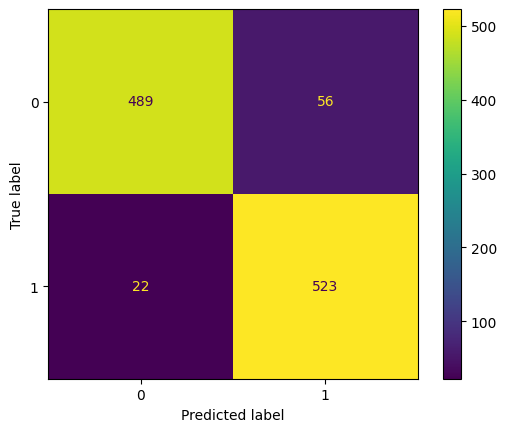

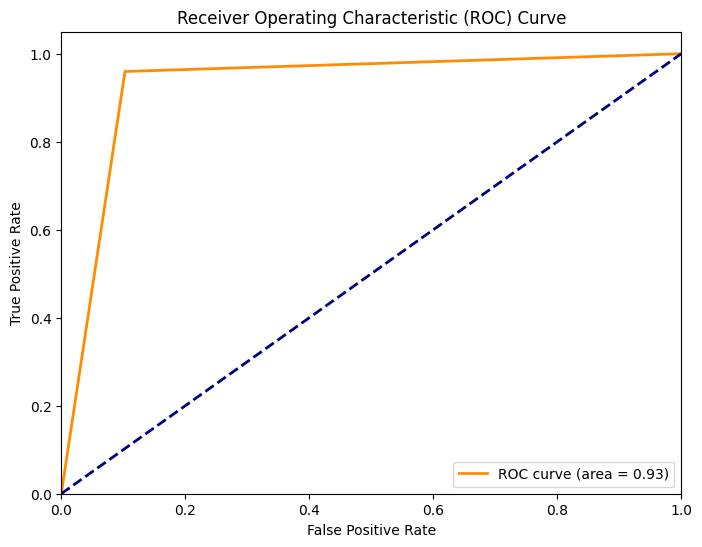

VGG13Cat
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       545
           1       0.93      0.94      0.93       545

    accuracy                           0.93      1090
   macro avg       0.93      0.93      0.93      1090
weighted avg       0.93      0.93      0.93      1090



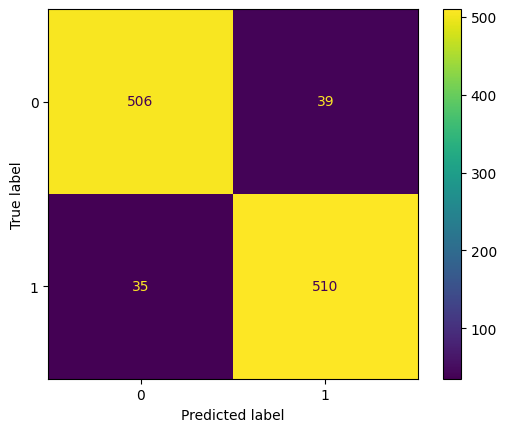

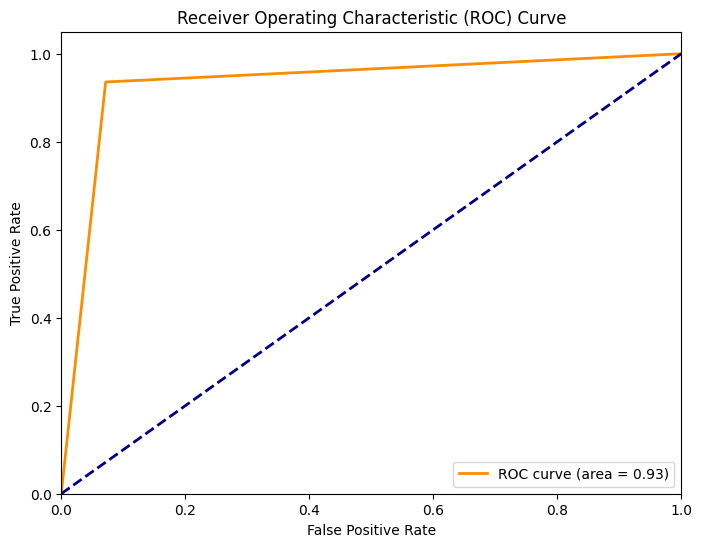

VGG16Cat
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       545
           1       0.91      0.96      0.93       545

    accuracy                           0.93      1090
   macro avg       0.93      0.93      0.93      1090
weighted avg       0.93      0.93      0.93      1090



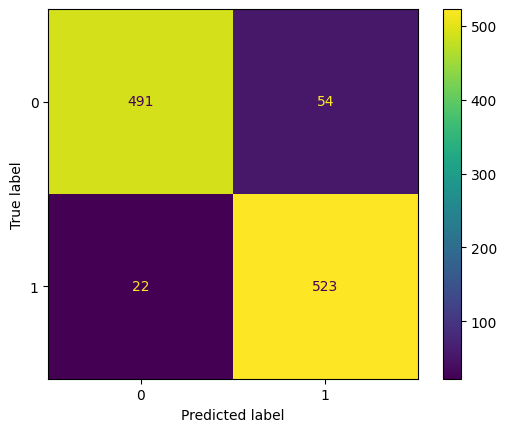

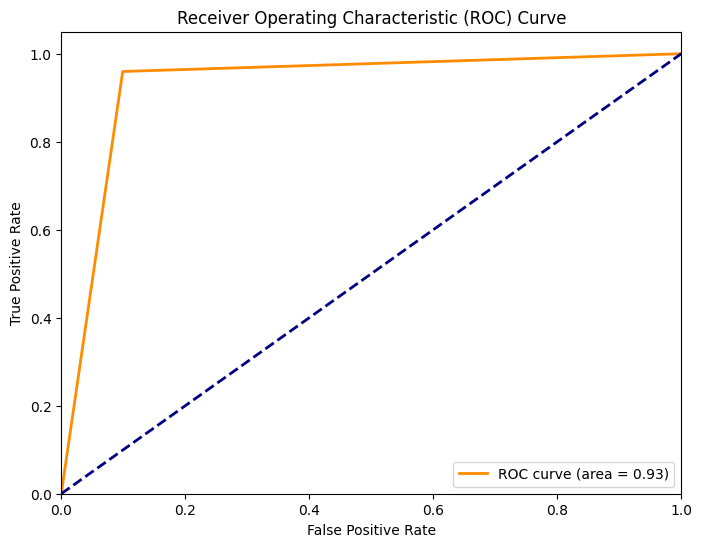

VGG19Cat
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       545
           1       0.91      0.96      0.93       545

    accuracy                           0.93      1090
   macro avg       0.93      0.93      0.93      1090
weighted avg       0.93      0.93      0.93      1090



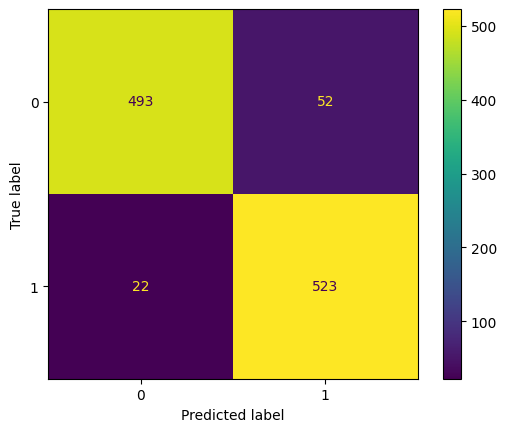

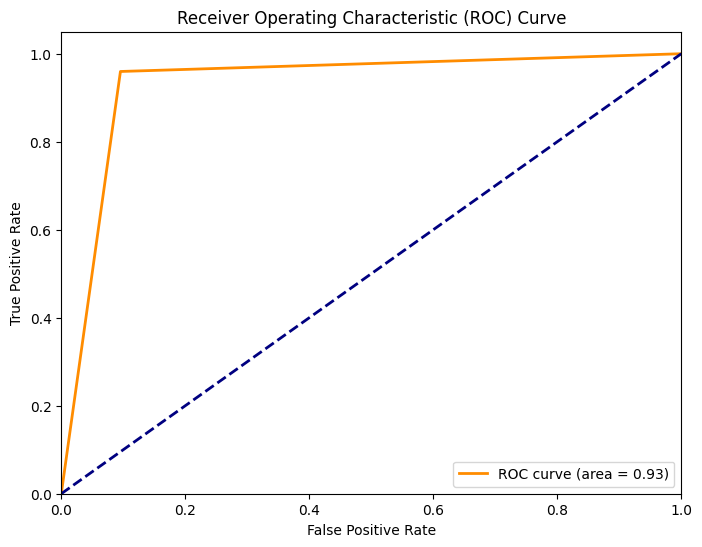

In [18]:
for item in custom_models:
    
    train_log = []
    valid_log = []
    
    model = item
    model = nn.DataParallel(model)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()

    model_class_name = type(item).__name__
    weight_path = f"weights_cat/{model_class_name}.pt"

    test_prediction = []
    test_label = []
    
    model.load_state_dict(load(weight_path))
    model.eval()
        
    with inference_mode():
        for step, batch in enumerate(test):
            img, label = batch
            img, label = img.to(device), label.to(device)
        
            prob = model(img)
            out = argmax(sigmoid(prob), axis=1)
        
            loss = criterion(prob, label)
        
            test_prediction.extend(out.detach().cpu().tolist())
            test_label.extend(label.detach().cpu().tolist())

    print(model_class_name)
    print(classification_report(test_label, test_prediction))

    cm = confusion_matrix(test_label, test_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
        
    fpr, tpr, thresholds = roc_curve(test_label, test_prediction)
        
    roc_auc = auc(fpr, tpr)
        
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
        

**Kesimpulan**: Akurasi daripada VGG Categorical + Sigmoid adalah lebih tinggi dibandingkan dengan VGG Binary, yaitu 93%. Berdasar terhadap confusion matrix, VGG13 merupakan model yang memiliki keluaran yang seimbang antara klasifikasi male dan female.

# Categorical VGG+Softmax Test Evaluation

/tmp/ipykernel_440137/3171460208.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = argmax(F.softmax(prob), axis=1)


VGG11Cat
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       545
           1       0.94      0.91      0.92       545

    accuracy                           0.92      1090
   macro avg       0.92      0.92      0.92      1090
weighted avg       0.92      0.92      0.92      1090



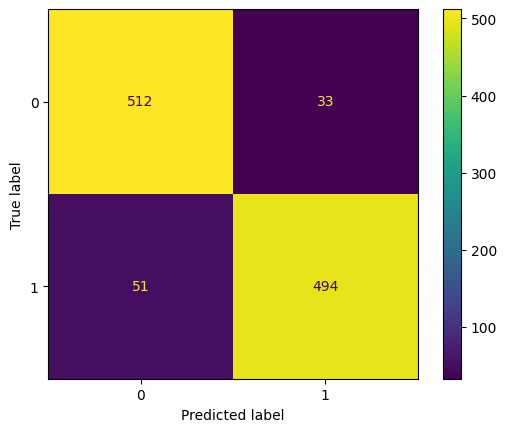

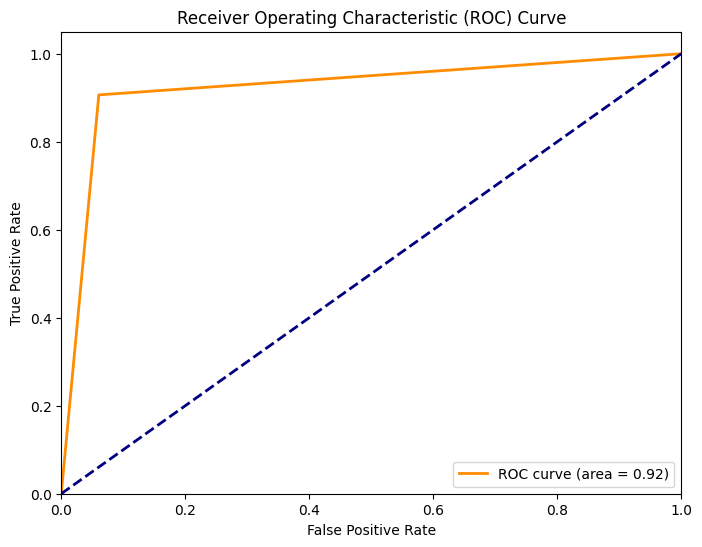

/tmp/ipykernel_440137/3171460208.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = argmax(F.softmax(prob), axis=1)


VGG13Cat
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       545
           1       0.89      0.95      0.92       545

    accuracy                           0.92      1090
   macro avg       0.92      0.92      0.92      1090
weighted avg       0.92      0.92      0.92      1090



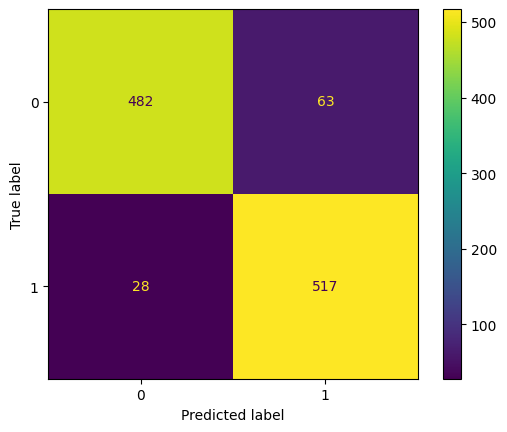

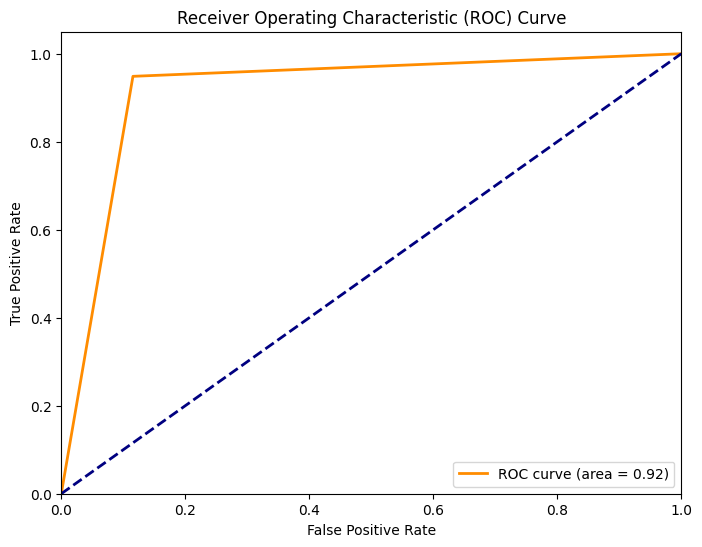

/tmp/ipykernel_440137/3171460208.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = argmax(F.softmax(prob), axis=1)


VGG16Cat
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       545
           1       0.94      0.85      0.89       545

    accuracy                           0.90      1090
   macro avg       0.90      0.90      0.90      1090
weighted avg       0.90      0.90      0.90      1090



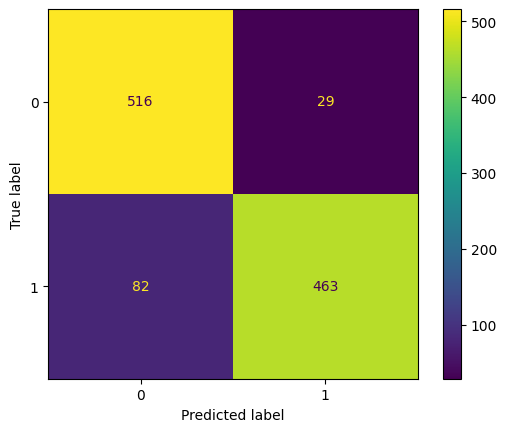

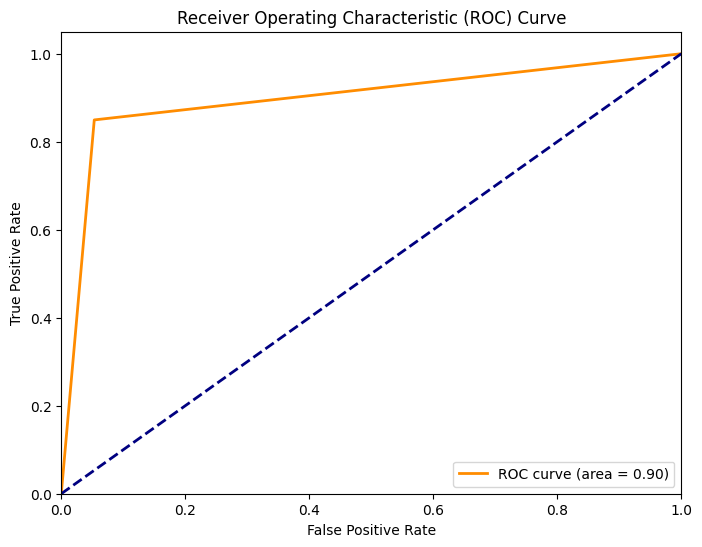

/tmp/ipykernel_440137/3171460208.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = argmax(F.softmax(prob), axis=1)


VGG19Cat
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       545
           1       0.93      0.88      0.91       545

    accuracy                           0.91      1090
   macro avg       0.91      0.91      0.91      1090
weighted avg       0.91      0.91      0.91      1090



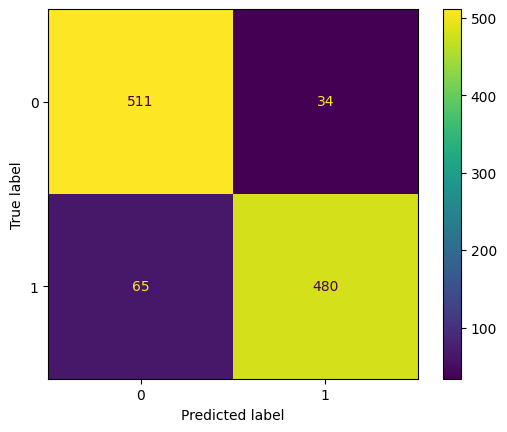

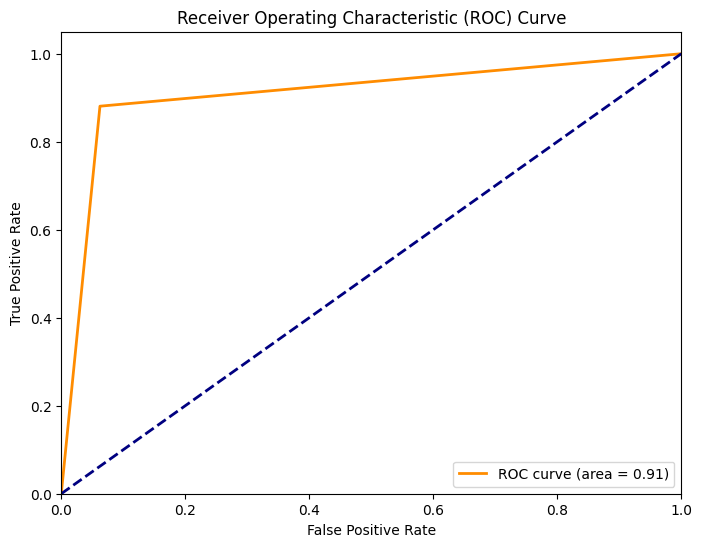

In [9]:
for item in custom_models:
    
    train_log = []
    valid_log = []
    
    model = item
    model = nn.DataParallel(model)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()

    model_class_name = type(item).__name__
    weight_path = f"weights_cat_softmax/{model_class_name}.pt"

    test_prediction = []
    test_label = []
    
    model.load_state_dict(load(weight_path))
    model.eval()
        
    with inference_mode():
        for step, batch in enumerate(test):
            img, label = batch
            img, label = img.to(device), label.to(device)
        
            prob = model(img)
            out = argmax(F.softmax(prob), axis=1)
        
            loss = criterion(prob, label)
        
            test_prediction.extend(out.detach().cpu().tolist())
            test_label.extend(label.detach().cpu().tolist())

    print(model_class_name)
    print(classification_report(test_label, test_prediction))

    cm = confusion_matrix(test_label, test_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
        
    fpr, tpr, thresholds = roc_curve(test_label, test_prediction)
        
    roc_auc = auc(fpr, tpr)
        
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
        

**Kesimpulan**: Akurasi VGG Categorical + Softmax lebih rendah dibandingkan VGG Categorical + Sigmoid. Berdasar terhadap confusion matrix, model ini cenderung memiliki bias.